
# STOR 320: Introduction to Data Science
## Lab 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1. 

In this problem, you are given a pandas DataFrame that contains data about various features of a product line. The dataset includes the following columns:

- `Product ID`: A unique identifier for each product.
- `Category`: The category the product belongs to (e.g., `"Electronics", "Furniture", "Clothing"`).
- `Price`: The price of the product.
- `Rating`: Customer rating of the product (out of 5).
- `Sales`: Sales generated from selling the product.


In [3]:
np.random.seed(42)
data = {
    'Product ID': np.arange(1, 101),
    'Category': np.random.choice(['Electronics', 'Furniture', 'Clothing'], size=100),
    'Price': np.random.uniform(10, 100, size=100),
    'Rating': np.random.uniform(1, 5, size=100)
}

df = pd.DataFrame(data)
df["Sales"] = - 0.2 * df["Price"] + 50 + np.random.normal(0, 40, size=100)
df.head(5)

,Product ID,Category,Price,Rating,Sales
0,1,Clothing,27.884411,1.066351,56.601083
1,2,Electronics,10.496991,3.048372,58.188902
2,3,Clothing,83.391529,1.905983,34.278967
3,4,Clothing,73.617161,3.580691,70.153127
4,5,Electronics,75.610645,1.697466,92.372124


**1.1**. Create a series of histograms to show the distribution of `Price` for each category. In other words, each subplot shows the distribution of one category. Obtain these plots using two different methods `matplotlib` and `seaborn`, and compare the outputs from both methods.  

**1.2**. Create a plot that displays the total sales for each category as a bar plot using `matplotlib`. On the same plot, also show the average rating for each category. Use the `twinx` function to create a secondary y-axis for the average ratings.

**1.3**.  Create a scatter plot to visualize the relationship between `Price` and `Sales` using `matplotlib`. Fit a quick linear regression model etween `Price` and `Sales` by utilizing `seaborn`'s built-in regression method `sns.regplot`. Include its 90% confidence interval.

**1.4**. Recreate the plot in **1.3** by adding the category information. Hint: Use `lmplot` instead of `regplot`.

For each plot, add labels, a title, and legend. 

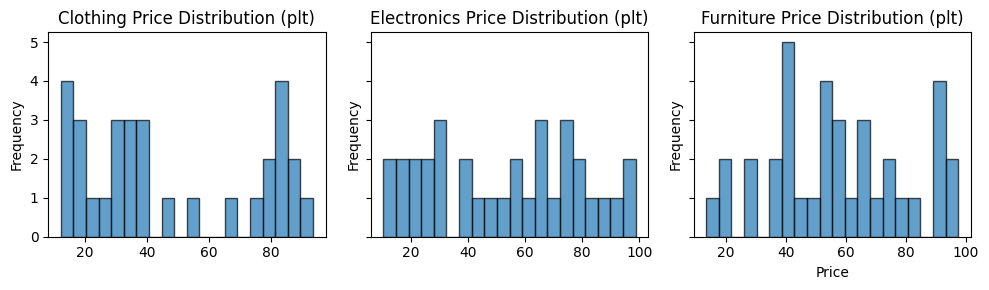

In [12]:
#1.1
categories = df["Category"].unique()

fig, axs = plt.subplots(1, len(categories), figsize=(10,3), sharey=True)

for i, category in enumerate(categories):
    category_data = df[df["Category"] == category]["Price"]
    axs[i].hist(category_data, bins=20, edgecolor="black", alpha=0.7)
    axs[i].set_title(f"{category} Price Distribution (plt)")
    axs[i].set_ylabel("Frequency")

plt.xlabel("Price")
plt.tight_layout()

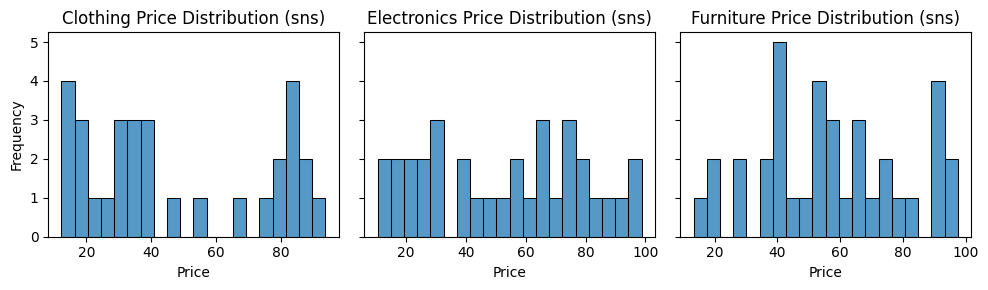

In [11]:
#1.1.5
categories = df["Category"].unique()

fig, axs = plt.subplots(1, len(categories), figsize=(10,3), sharey=True)

for i, category in enumerate(categories):
    category_data = df[df["Category"] == category]
    sns.histplot(data=category_data, x="Price", bins=20, kde=False, ax=axs[i])
    axs[i].set_title(f"{category} Price Distribution (sns)")
    axs[i].set_ylabel("Frequency")

plt.xlabel("Price")
plt.tight_layout()

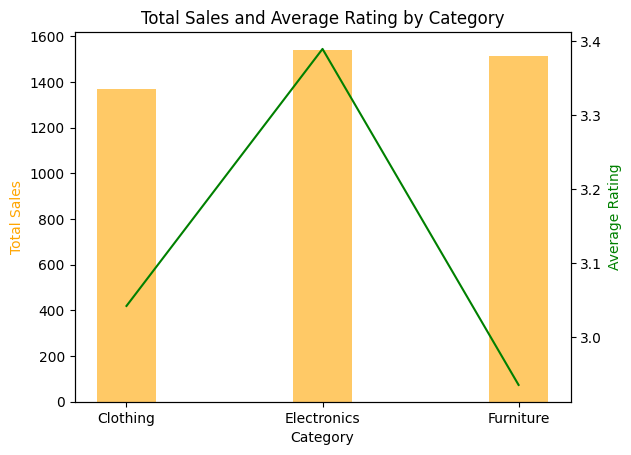

In [26]:
#1.2
table = df.groupby("Category").agg({"Sales": "sum", "Rating": "mean"})

fig = plt.figure()
ax = plt.axes()

ax.bar(table.index, table["Sales"], label="Total Sales", color="orange", width=0.3, alpha=0.6)
ax.set_ylabel("Total Sales", color="orange")
ax.set_xticks(table.index)

ax2 = ax.twinx()
ax2.plot(table.index, table["Rating"], label="Average Rating", c="green")
ax2.set_ylabel("Average Rating", c="green")

ax.set_title("Total Sales and Average Rating by Category")
ax.set_xlabel("Category")

plt.show()

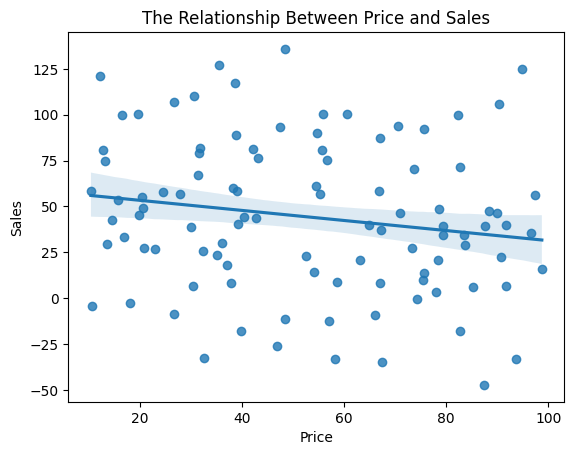

In [30]:
#1.3
sns.regplot(data=df, x="Price", y="Sales", ci=90)
plt.title("The Relationship Between Price and Sales")

plt.show()

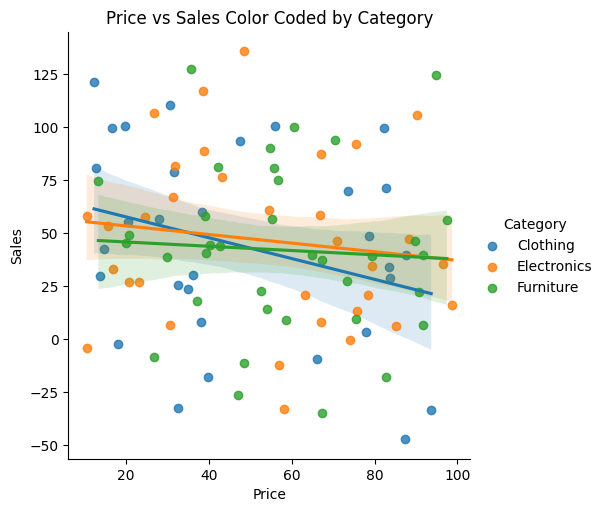

In [38]:
#1.4
sns.lmplot(data=df, x="Price", y="Sales", hue="Category", ci=90)
plt.title("Price vs Sales Color Coded by Category")
plt.show()